# <span style="color: hotpink">Project 1: Defining a Problem and Data Understanding
### <span style="color: hotpink">Fabiola Rojas</span>
---

### <span style="color: hotpink">The Problem</span>  
The goal of this project is to investigate factors that influence delivery time and customer satisfaction, focusing on variables such as vehicle type, delivery person age, weather conditions, and traffic levels. Specifically, I seek to answer the following questions
1. How does vehicle type impact delivery time and rating?
2. Does the age of the delivery person have any correlation to delivery time?
3. How extreme do external factors (weather, traffic) need to be to have an impact on delivery times?
4. Are customers understanding about these external factors? At what point does the customer become dissatisfied?

---


### <span style="color: hotpink">The Data
The [Food Delivery Time](https://www.kaggle.com/datasets/gautamdeora7/food-delivery-time-a-multi-factor-dataset?resource=download) dataset was created by kaggle users, sourcing data through kaggle and various weather and traffic APIs, with the goal to accurately predict food delivery times. Features include age and ratings for delivery personnel, restaurant and delivery locations, order and vehicle information, weather descriptions, traffic levels, distance, and delivery time. 

---

In [6]:
import pandas as pd
delivery_df = pd.read_csv("/Users/fabiolarojas/Documents/itcs3162/Food_Time_Data_Set.csv")

In [7]:
delivery_df.shape

(10001, 18)

In [8]:
delivery_df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Unnamed: 14', 'Traffic_Level', 'Distance (km)', 'TARGET'],
      dtype='object')

In [9]:
delivery_df.columns = delivery_df.columns.str.lower()

In [10]:
delivery_df

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,temperature,humidity,precipitation,weather_description,unnamed: 14,traffic_level,distance (km),target
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,11B4,VADRES13DEL03,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,0.0,haze,NaN,High,18.92,32.61666667
9997,8336,HYDRES20DEL01,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,0.0,haze,NaN,Low,2.64,12.01666667
9998,338B,JAPRES18DEL03,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,0.0,clear sky,NaN,Very High,28.80,51.06666667
9999,3FB2,MUMRES11DEL03,29.0,4.7,18.994237,72.825553,19.084237,72.915553,Meal,scooter,28.01,57.0,0.0,smoke,NaN,High,17.63,43.8


<span style="color: hotpink;">The column "Unnamed: 14" is all nulls, as well as the last row, so I'll remove these. It also looks like the temperature column is in Celsius and distance is in kilometers, so I'll convert these to Fahrenheit and miles respectively to make them more easily interpretable for me.</span>  


In [12]:
delivery_df = delivery_df.drop(columns='unnamed: 14')
delivery_df = delivery_df.iloc[:-1]
delivery_df.shape

(10000, 17)

In [13]:
delivery_df['temperature'] = (delivery_df['temperature'] * 9/5) + 32
delivery_df['temperature'].head()

0    62.798
1    67.100
2    68.810
3    74.948
4    79.790
Name: temperature, dtype: float64

In [14]:
delivery_df['distance'] = delivery_df['distance (km)'] * 0.621371
delivery_df['distance'].head()

0          NaN
1    23.096360
2     2.075379
3     6.244779
4     6.145359
Name: distance, dtype: float64

In [15]:
delivery_df.dtypes

id                              object
delivery_person_id              object
delivery_person_age            float64
delivery_person_ratings        float64
restaurant_latitude            float64
restaurant_longitude           float64
delivery_location_latitude     float64
delivery_location_longitude    float64
type_of_order                   object
type_of_vehicle                 object
temperature                    float64
humidity                       float64
precipitation                  float64
weather_description             object
traffic_level                   object
distance (km)                  float64
target                          object
distance                       float64
dtype: object

In [16]:
delivery_df.isna().sum()

id                               0
delivery_person_id               0
delivery_person_age              0
delivery_person_ratings          0
restaurant_latitude              0
restaurant_longitude             0
delivery_location_latitude       0
delivery_location_longitude      0
type_of_order                    0
type_of_vehicle                  0
temperature                      5
humidity                         5
precipitation                    5
weather_description              5
traffic_level                  915
distance (km)                  920
target                         541
distance                       920
dtype: int64

<span style="color: hotpink;">There are 541 nulls for target. Target is the most important column for investigating the impact of external factors, so let's look at this column. The dtype should be float, but it's actually object. It's possible there are some strings hidden in there.</span>

In [18]:
print(delivery_df['target'].apply(type).unique())


[<class 'str'> <class 'float'>]


<span style="color: hotpink;">Now we know this column contains floats as expected, as well as nulls and strings. Let's make sure the column only contains numeric characters.</span>

In [20]:
delivery_df[delivery_df['target'].str.match(r'^[A-Za-z]+$', na=False)]


,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,temperature,humidity,precipitation,weather_description,traffic_level,distance (km),target,distance


In [21]:
delivery_df['target'].dropna().apply(type).value_counts()


target
<class 'str'>    9459
Name: count, dtype: int64

<span style="color: hotpink;">All the target rows contain numeric strings, aside from the 541 nulls. We'll keep the nulls for now but convert the strings to floats.</span>

In [23]:
delivery_df['target'] = pd.to_numeric(delivery_df['target'], errors='coerce')
delivery_df.dtypes

id                              object
delivery_person_id              object
delivery_person_age            float64
delivery_person_ratings        float64
restaurant_latitude            float64
restaurant_longitude           float64
delivery_location_latitude     float64
delivery_location_longitude    float64
type_of_order                   object
type_of_vehicle                 object
temperature                    float64
humidity                       float64
precipitation                  float64
weather_description             object
traffic_level                   object
distance (km)                  float64
target                         float64
distance                       float64
dtype: object

<span style="color: hotpink;">There are only 5 nulls for temperature, humidity, precipitation, and weather_description. Let's see if they're all in the same rows</span>

In [25]:
delivery_df[delivery_df['temperature'].isna()]

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,temperature,humidity,precipitation,weather_description,traffic_level,distance (km),target,distance
5000,60C2,HYDRES01DEL03,26.0,4.9,17.410371,78.437225,17.440371,78.467225,Drinks,scooter,NaN,NaN,NaN,NaN,Moderate,8.51,NaN,5.287867
6000,2ECE,SURRES11DEL01,24.0,4.5,21.157735,72.768778,21.267735,72.878778,Drinks,motorcycle,NaN,NaN,NaN,NaN,High,22.71,NaN,14.111335
7000,3D19,SURRES13DEL01,34.0,3.6,21.170096,72.789122,21.240096,72.859122,Drinks,electric_scooter,NaN,NaN,NaN,NaN,High,13.50,NaN,8.388509
8000,61EA,SURRES02DEL02,25.0,4.8,21.186608,72.794136,21.266608,72.874136,Drinks,scooter,NaN,NaN,NaN,NaN,High,17.99,NaN,11.178464
9000,5.00E+33,CHENRES17DEL01,28.0,4.8,13.045479,80.233110,13.085479,80.273110,Buffet,scooter,NaN,NaN,NaN,NaN,Low,8.55,NaN,5.312722


<span style="color: hotpink;">We can remove these 5 rows, it won't make much of a difference.</span>

In [27]:
delivery_df = delivery_df.drop([5000,6000,7000,8000,9000], axis=0)
delivery_df.isna().sum()

id                               0
delivery_person_id               0
delivery_person_age              0
delivery_person_ratings          0
restaurant_latitude              0
restaurant_longitude             0
delivery_location_latitude       0
delivery_location_longitude      0
type_of_order                    0
type_of_vehicle                  0
temperature                      0
humidity                         0
precipitation                    0
weather_description              0
traffic_level                  915
distance (km)                  920
target                         955
distance                       920
dtype: int64

<span style="color: hotpink;">I also won't be making use of id, delivery_person_id, latitude, or longitude, so I'll drop these columns.</span>

In [29]:
delivery_df = delivery_df.drop(columns=['id', 'delivery_person_id', 'restaurant_latitude', 'restaurant_longitude',
                          'delivery_location_latitude', 'delivery_location_longitude'])

---

## <span style="color: hotpink">Data Understanding/Visualization

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [32]:
delivery_df.head()

,delivery_person_age,delivery_person_ratings,type_of_order,type_of_vehicle,temperature,humidity,precipitation,weather_description,traffic_level,distance (km),target,distance
0,37.0,4.9,Snack,motorcycle,62.798,77.0,0.0,haze,Low,NaN,21.666667,NaN
1,34.0,4.5,Snack,scooter,67.100,93.0,0.0,mist,Very High,37.17,85.266667,23.096360
2,23.0,4.4,Drinks,motorcycle,68.810,91.0,0.0,mist,Low,3.34,28.583333,2.075379
3,38.0,4.7,Buffet,motorcycle,74.948,78.0,0.0,mist,Moderate,10.05,35.183333,6.244779
4,32.0,4.6,Snack,scooter,79.790,87.0,0.0,mist,High,9.89,43.450000,6.145359


In [33]:
delivery_df.shape

(9995, 12)

In [34]:
cat_cols = ['type_of_order', 'type_of_vehicle', 'weather_description', 'traffic_level']
num_cols = ['delivery_person_age', 'delivery_person_ratings', 'temperature', 'humidity', 
            'precipitation', 'distance', 'target']

### <span style="color: hotpink">Categorical Features

<span style="color: hotpink;">Let's look at the content of the categorical columns first.</span>

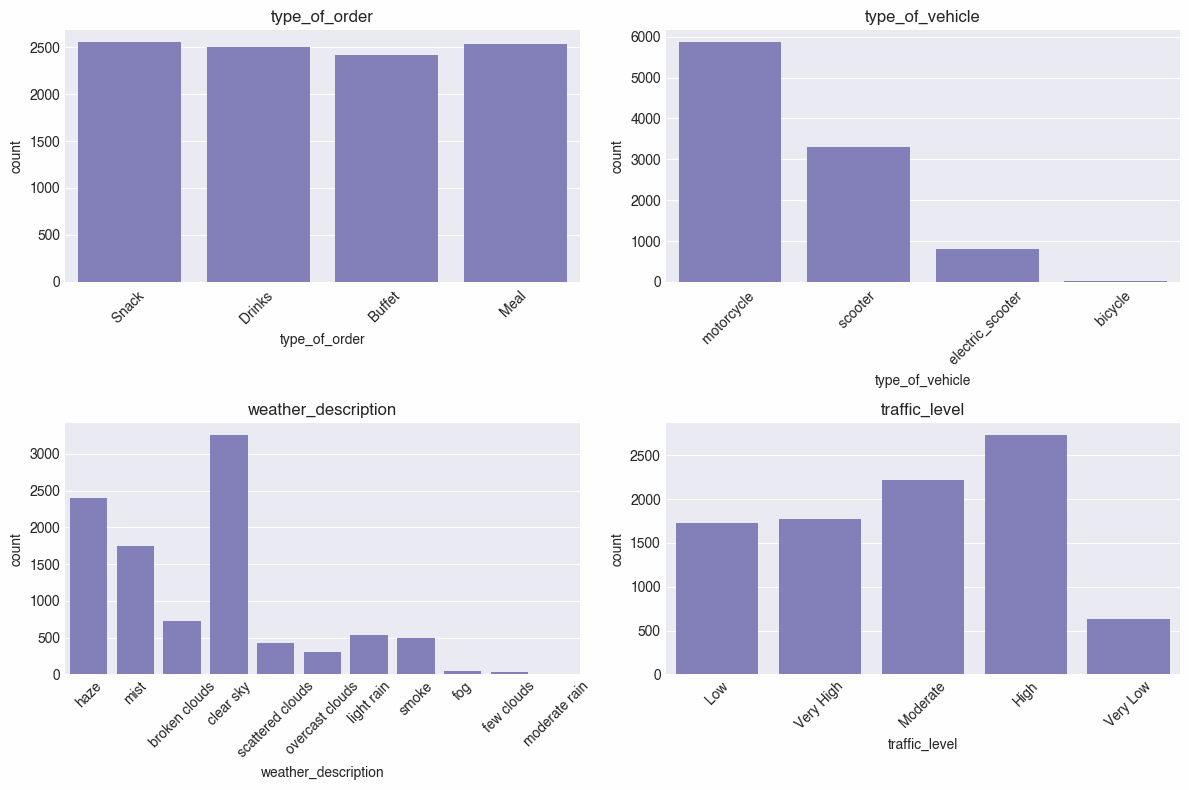

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(x=delivery_df[col], ax=ax)
    ax.set_title(f'{col}')
    ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


<span style="color: hotpink">It looks like order type is pretty balanced, traffic is usually present in some capacity, the weather is usually pretty clear, and most of the vehicles are motorcycles. Suprisingly, there aren't any car drivers in this dataset. We can explore if the type of order, vehicle, or amount of traffic have an impact on delivery time and ratings. Because there isn't any data for harsh weather, we probably won't find any useful information on weather's impact on delivery time. It could however contribute indirectly to traffic and how many orders are coming in, because people are probably more likely to be on the roads and eat out on a nice day. Let's look at the spread of the numerical columns next.</span>

### <span style="color: hotpink">Numerical Features

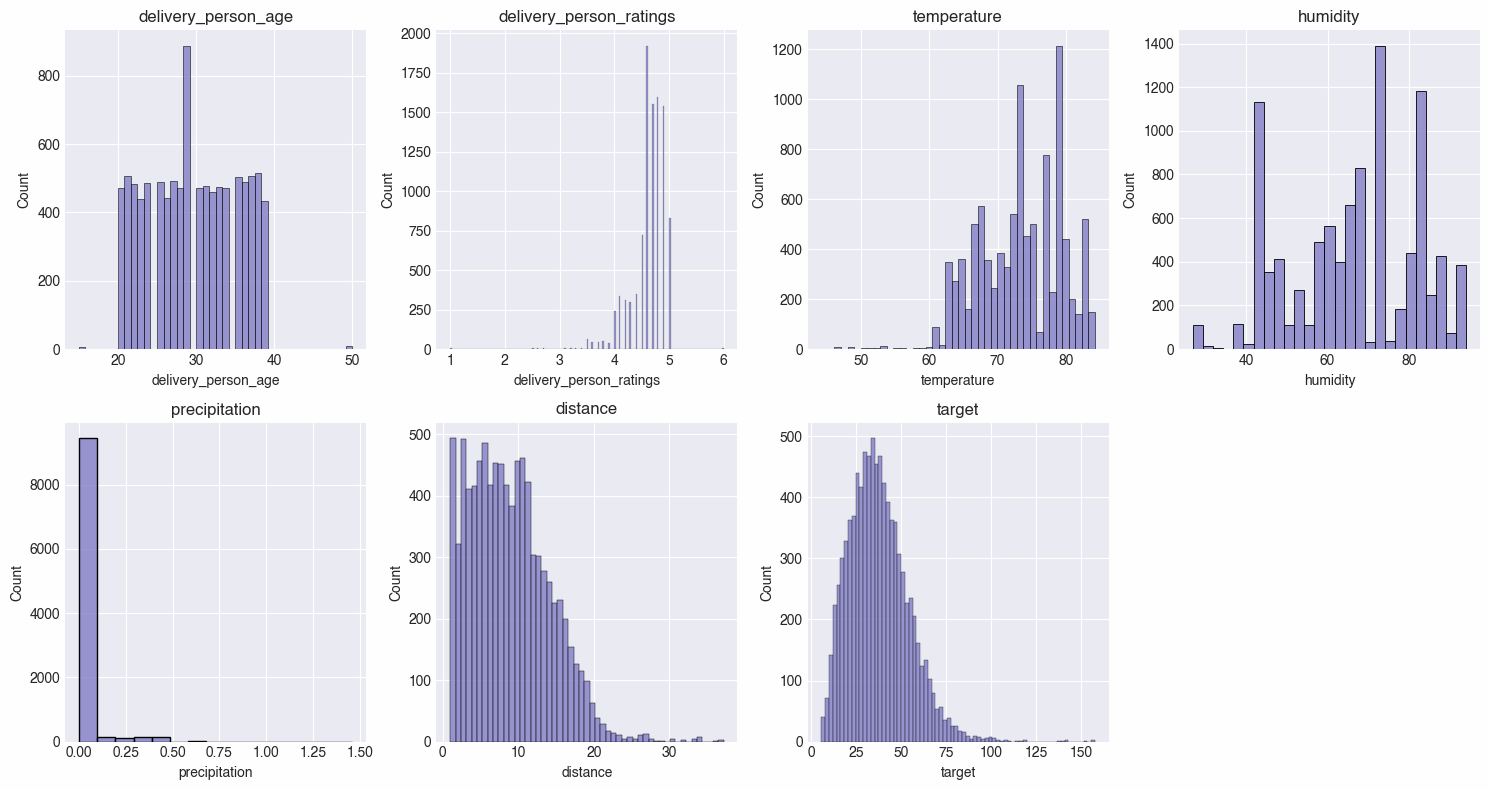

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):  
    sns.histplot(delivery_df[col], ax=axes[i])
    axes[i].set_title(col)

if len(num_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


<span style="color: hotpink;">Looking at the age plot, we can see that ages are pretty evenly spread (aside from the very center), ranging from 20 to about 39, with outliers at 15 and 50, and a mean and mode of 29. The lower extreme is interesting, I'm not very familiar with age limits for delivery jobs but this seems pretty young. We can look at the difference in ratings among 29 year olds based on vehicle type. Ratings are left skewed, with most drivers having ratings above about 4.5, very few are in the low 4s and even fewer fall below. Some values lie above 5, which is strange as I don't know any services that rate on a scale other than 1 through 5. Temperature and humidity are pretty random, and it looks like there's usually little to no precipitation, which aligns with our findings from the weather description column. Distance is right skewed and most of the data is between about 1 and 12 miles with a mean of 8 miles, so we can see how delivery time varies for different vehicles traveling about 8 miles. Target is also right skewed with very high outliers. Most data falls between about 5 and 50, so we can explore what causes delivery time to exceed this range.</span>

In [42]:
delivery_df[num_cols].describe()

,delivery_person_age,delivery_person_ratings,temperature,humidity,precipitation,distance,target
count,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9075.000000,9040.000000
mean,29.523062,4.629425,73.286433,66.164882,0.016233,8.881112,37.656750
std,5.701021,0.322835,6.083006,15.602939,0.074911,5.205576,16.555938
min,15.000000,1.000000,44.186000,27.000000,0.000000,0.963125,5.800000
25%,25.000000,4.500000,68.252000,54.000000,0.000000,4.734847,25.566667
50%,29.000000,4.700000,73.400000,67.000000,0.000000,8.326371,35.983333
75%,34.000000,4.800000,78.764000,81.000000,0.000000,12.185085,47.633333
max,50.000000,6.000000,84.290000,94.000000,1.460000,37.182841,157.750000


### <span style="color: hotpink">Exploration of Distance and Target

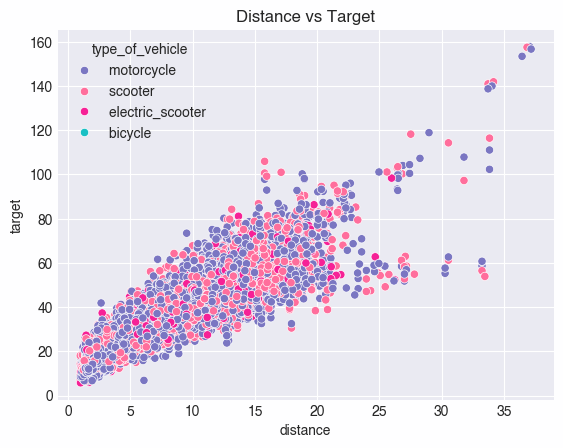

In [140]:
sns.scatterplot(data=delivery_df, x="distance", y="target", hue='type_of_vehicle')
plt.title("Distance vs Target")
plt.show()


<span style="color: hotpink;">Here we can confirm our expectation that greater distance leads to longer delivery times.</span>

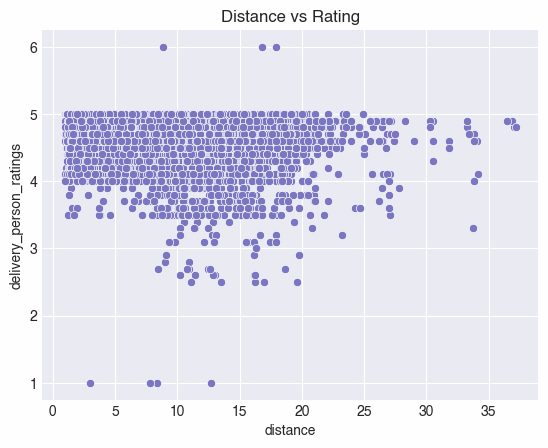

In [172]:
sns.scatterplot(data=delivery_df, y='delivery_person_ratings', x='distance')

plt.title('Distance vs Rating')
plt.ylabel('delivery_person_ratings')
plt.xlabel('distance') 

plt.show()

<span style="color: hotpink">Surprisingly, there aren't many low ratings for longer distances. This could be because the customer is understanding of the fact that longer distances will result in a longer delivery time and can set their expectations reasonably. Many of the lower ratings are for shorter distances. It is possible that customers expect their food to arrive faster if they are closer by, but other factors could also be involved.</span>

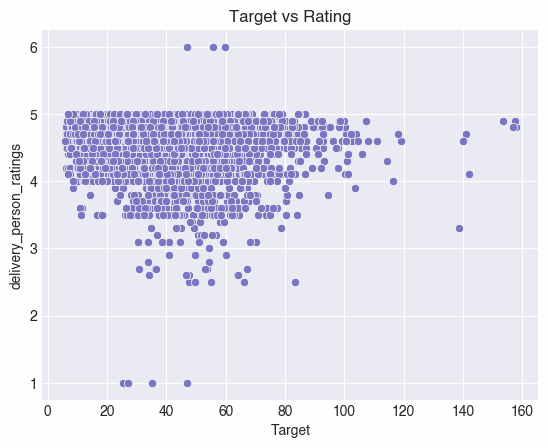

In [176]:
sns.scatterplot(data=delivery_df, y='delivery_person_ratings', x='target')

plt.title('Target vs Rating')
plt.ylabel('delivery_person_ratings')
plt.xlabel('Target') 

plt.show()

<span style="color: hotpink">This plot is almost identical to the previous one, which makes sense given the direct correlation between target and distance.</span>

### <span style="color: hotpink;">Exploration of Vehicle Type

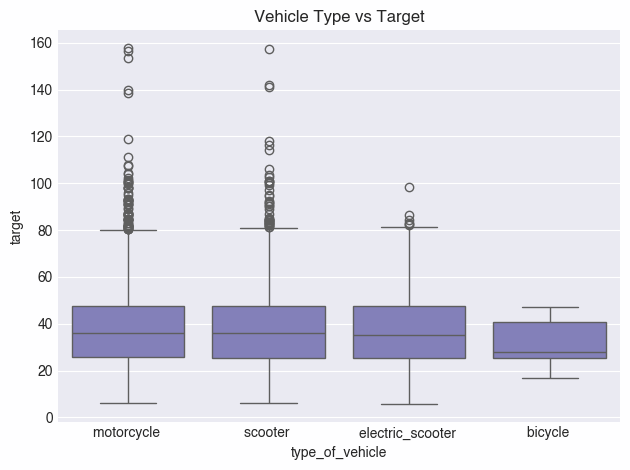

In [44]:
sns.boxplot(x='type_of_vehicle', y='target', data=delivery_df)

plt.xlabel('type_of_vehicle')
plt.ylabel('target')
plt.title('Vehicle Type vs Target')

plt.tight_layout()

<span style="color: hotpink;">Here we  can see that the median time for all types of vehicles is about the same. Bicycle users average slightly lower times, but this is likely because they choose not to travel long distances, and there is less data on bicycles. Now as for scooter and electric scooter, assuming this dataset is not American based on the use of metric units, I doubt these are the scooters we're thinking of here. They're probably more similar to motorcycles. Electric scooter users don't have as much of a spread in delivery times as the other vehicle types, and this may be attributed to the little data we have. Motorcycles and scooters, the most common vehicles, have very similar spreads. They are more likely to be able and willing to travel longer distances, so this explains the higher delivery times. As we have more data on these, it's also likely we have more evidence of these vehicles getting stuck in traffic.</span>

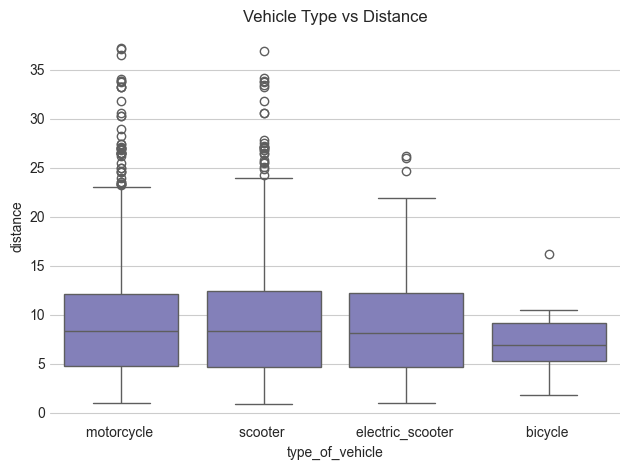

In [214]:
sns.boxplot(x='type_of_vehicle', y='distance', data=delivery_df)

plt.xlabel('type_of_vehicle')
plt.ylabel('distance')
plt.title('Vehicle Type vs Distance')

plt.tight_layout()

<span style="color: hotpink;">This graph is very similar to the previous one. We can confirm that motorcycles and scooters sometimes have longer delivery times because they travel longer distances than the other vehicle types.</span>

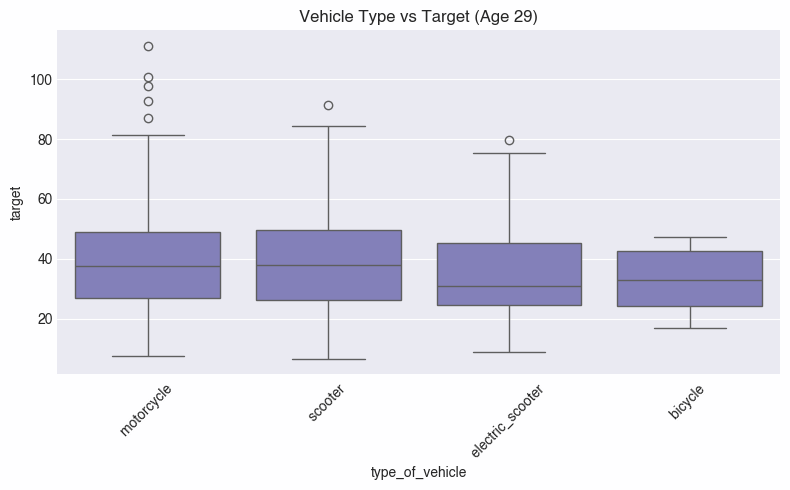

In [46]:
age_29 = delivery_df[delivery_df['delivery_person_age'] == 29.0]

order = delivery_df['type_of_vehicle'].unique()

plt.figure(figsize=(8, 5))
sns.boxplot(x='type_of_vehicle', y='target', data=age_29, order=order)

plt.xlabel('type_of_vehicle')
plt.ylabel('target')
plt.title('Vehicle Type vs Target (Age 29)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<span style="color: hotpink;">Delivery drivers aged 29 mostly drive motorcycles, have a similar median delivery time to the rest of the dataset's population, and have much fewer outliers. This is likely just due to chance in avoiding traffic.</span>

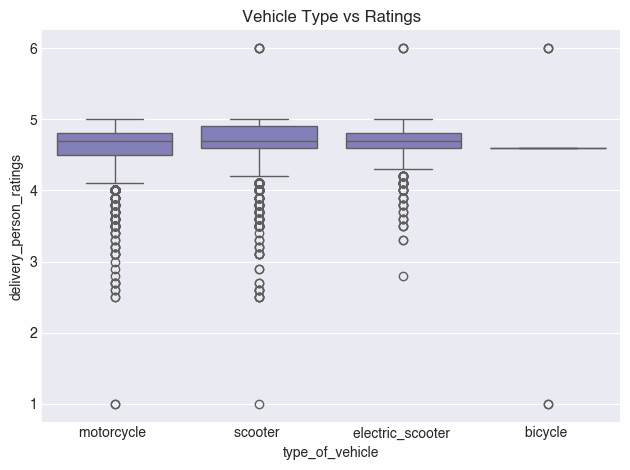

In [48]:
sns.boxplot(x='type_of_vehicle', y='delivery_person_ratings', data=delivery_df)

plt.xlabel('type_of_vehicle')
plt.ylabel('delivery_person_ratings')
plt.title('Vehicle Type vs Ratings')

plt.tight_layout()

<span style="color: hotpink;">The median ratings across all vehicle types are pretty high as expected, above 4.5. There are several lower ratings as well, likely due to traffic or distance.</span>

### <span style="color: hotpink;">Exploration of Traffic Level

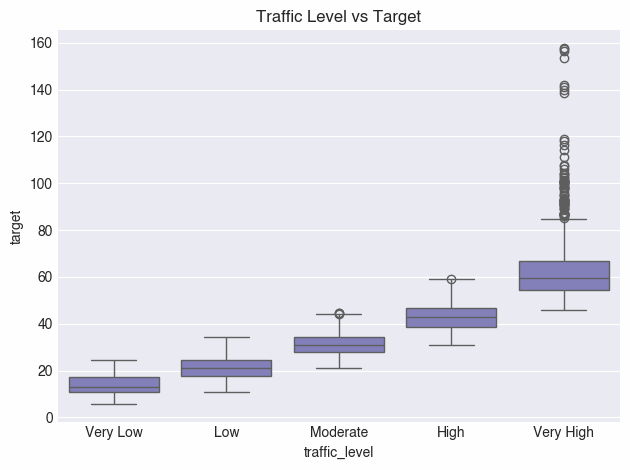

In [51]:
order = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

sns.boxplot(x='traffic_level', y='target', data=delivery_df, order=order)

plt.xlabel('traffic_level')
plt.ylabel('target')
plt.title('Traffic Level vs Target')

plt.tight_layout()

<span style="color: hotpink">As traffic level increases, so does delivery time. The traffic level data was somewhat balanced, with 'Very High' being the largest class and 'Very Low' being the smallest. The variability is small for all traffic levels, but the highest traffic level has several outliers. This shows just how much delivery time is impacted by very high traffic levels.</span>

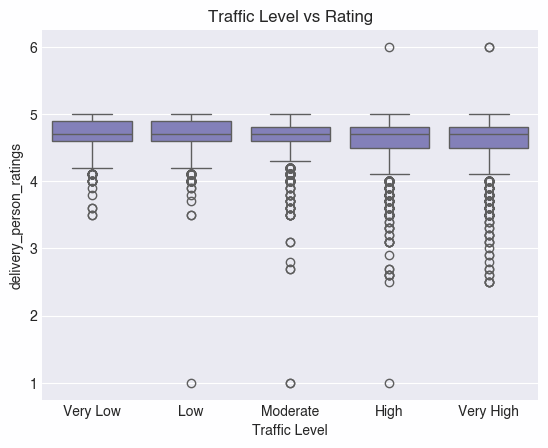

In [149]:
sns.boxplot(data=delivery_df, x='traffic_level', y='delivery_person_ratings', order=order)

plt.title('Traffic Level vs Rating')
plt.xlabel('Traffic Level')
plt.ylabel('delivery_person_ratings')

plt.show()


<span style="color: hotpink">The spread of the data for moderate, high, and very high traffic suggests that traffic levels may have an impact on ratings, but the anomalies of ratings greater than 6 are confusing. Hopefully they are just data entry errors. The spread is also not that far off from very low and low traffic, suggesting that traffic may not be that significant to ratings and that other factors may come into play. The consistently high ratings show that customers usually rate their drivers favorably.</span>

---

## <span style="color: hotpink">Storytelling

Through my analysis of the Food Delivery Time dataset, I've been able to answer most of my inital questions that I posed about factors affecting delivery times and customer ratings.  

Ratings appear to be highly subjective and show little to no correlation with other features. This suggests that ratings are influenced by individual customer experiences and other factors not included in this dataset rather than delivery performances.  

Areas with very high traffic are associated with significantly longer delivery times, making traffic the most important factor in predicting delivery times.  

With motorcycles and scooters being the most common vehicle in the dataset, they are more likely to make deliveries across all distances and may be more susceptible to getting held up in traffic.

---

## <span style="color: hotpink">Impact

The findings from this analysis could help food delivery services optimize their operations. With the knowledge that traffic has a significant impact on delivery times, they could implement traffic analysis to adjust driver routes and inform customers if they are to expect delays. Futhermore, as ratings seem to be mostly unrelated to the external factors explored in this dataset, more communication between the service, customers, and restaurants can reveal why customers provide lower ratings in order to improve customer satisfaction.  

Because of the limited scope of this dataset (lack of weather information, limited data on other vehicle types, driver experience), overreliance on this analysis places an unbalanced focus on speed, setting unrealistic expectations on drivers. Customer ratings are clearly very nuanced and require further exploration outside this dataset.

---

## <span style="color: hotpink">References  
1. https://www.datacamp.com/cheat-sheet/python-seaborn-cheat-sheet
2. ChatGPT for debugging.